In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import platform

In [2]:
tf.__version__

'2.8.0'

### Data Preprocessing

#### Data download

In [3]:
if platform.platform()[:3].lower() == 'win':
    cache_subdir = 'D:/workspace/Pycharm/tf25/dataset/'
elif platform.platform()[:3].lower() == 'mac':
    cache_subdir = '/Users/rainyseason/winston/Workspace/python/Pycharm Project/tf25/cats_and_dogs/'

In [4]:
cache_subdir

'D:/workspace/Pycharm/tf25/dataset/'

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', 
                                      cache_subdir=cache_subdir, 
                                      origin=_URL, extract=True)

In [6]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [7]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [8]:
shuffle=True

In [20]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [21]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                shuffle=shuffle,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


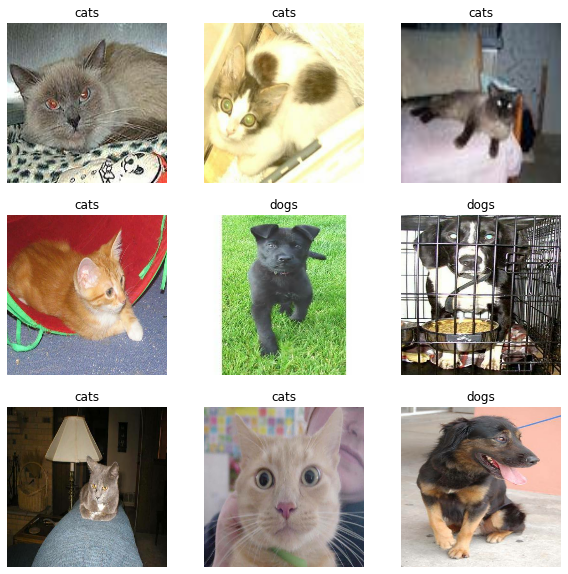

In [22]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy()])
        plt.axis('off')

In [32]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [33]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


#### Configure the dataset for performance

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

#### Use data augmentation

In [36]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

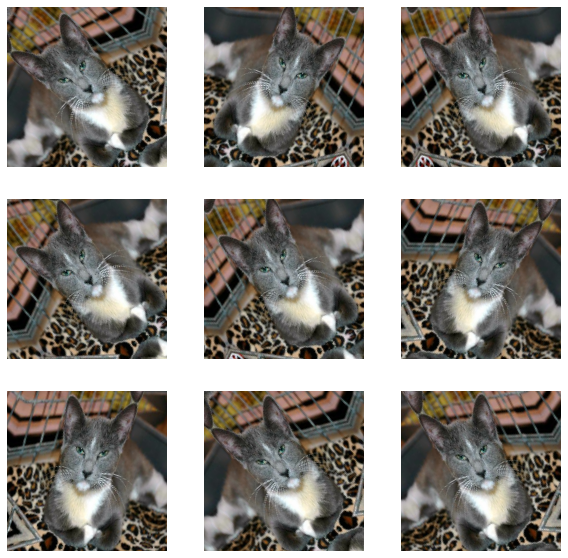

In [40]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [41]:
tf.expand_dims(first_image, 0)

<tf.Tensor: shape=(1, 160, 160, 3), dtype=float32, numpy=
array([[[[125.97992 ,  82.80625 ,  75.86563 ],
         [127.020744,  75.6645  ,  71.6645  ],
         [123.22481 ,  71.137695,  66.97813 ],
         ...,
         [ 77.4625  ,  41.4625  ,   7.4625  ],
         [ 78.38013 ,  42.380127,   8.380129],
         [ 82.925   ,  43.925   ,  12.925   ]],

        [[118.397736,  77.08012 ,  69.52699 ],
         [120.37187 ,  70.59688 ,  65.984375],
         [116.950584,  67.76933 ,  62.85996 ],
         ...,
         [ 78.703125,  39.703125,   6.703125],
         [ 80.6125  ,  41.6125  ,   8.6125  ],
         [ 80.6125  ,  41.6125  ,  10.6125  ]],

        [[111.01543 ,  71.27168 ,  64.625   ],
         [114.004295,  67.69942 ,  63.134377],
         [111.34473 ,  66.09375 ,  61.109375],
         ...,
         [ 83.765625,  44.765625,  11.765625],
         [ 87.315056,  48.315056,  15.315056],
         [ 88.4375  ,  49.4375  ,  18.4375  ]],

        ...,

        [[ 71.46387 ,  65.62285 , 

In [42]:
first_image

<tf.Tensor: shape=(160, 160, 3), dtype=float32, numpy=
array([[[125.97992 ,  82.80625 ,  75.86563 ],
        [127.020744,  75.6645  ,  71.6645  ],
        [123.22481 ,  71.137695,  66.97813 ],
        ...,
        [ 77.4625  ,  41.4625  ,   7.4625  ],
        [ 78.38013 ,  42.380127,   8.380129],
        [ 82.925   ,  43.925   ,  12.925   ]],

       [[118.397736,  77.08012 ,  69.52699 ],
        [120.37187 ,  70.59688 ,  65.984375],
        [116.950584,  67.76933 ,  62.85996 ],
        ...,
        [ 78.703125,  39.703125,   6.703125],
        [ 80.6125  ,  41.6125  ,   8.6125  ],
        [ 80.6125  ,  41.6125  ,  10.6125  ]],

       [[111.01543 ,  71.27168 ,  64.625   ],
        [114.004295,  67.69942 ,  63.134377],
        [111.34473 ,  66.09375 ,  61.109375],
        ...,
        [ 83.765625,  44.765625,  11.765625],
        [ 87.315056,  48.315056,  15.315056],
        [ 88.4375  ,  49.4375  ,  18.4375  ]],

       ...,

       [[ 71.46387 ,  65.62285 ,  61.957615],
        [ 30.